In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn.preprocessing import LabelEncoder

## Q1.  50 Startups

+ Reading the data and roughly examining it 

In [3]:
su_df = pd.read_csv('50_Startups.csv')
print(su_df.head(3))

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39


In [4]:
print(su_df.shape)

(50, 5)


In [5]:
print(su_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [6]:
print(su_df.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [7]:
lab = LabelEncoder()
df1 = su_df.copy()
df1.columns = ['RD','Admin','MS','St','Profit']
df1['St'] = lab.fit_transform(df1['St'])
print(df1.head(3))

          RD      Admin         MS  St     Profit
0  165349.20  136897.80  471784.10   2  192261.83
1  162597.70  151377.59  443898.53   0  191792.06
2  153441.51  101145.55  407934.54   1  191050.39


In [8]:
print(df1.corr())

              RD     Admin        MS        St    Profit
RD      1.000000  0.241955  0.724248  0.104685  0.972900
Admin   0.241955  1.000000 -0.032154  0.011847  0.200717
MS      0.724248 -0.032154  1.000000  0.077670  0.747766
St      0.104685  0.011847  0.077670  1.000000  0.101796
Profit  0.972900  0.200717  0.747766  0.101796  1.000000


+ There seems to be some corelation between 'MS' and 'RD' so it may not be a good idea to use both of them as X

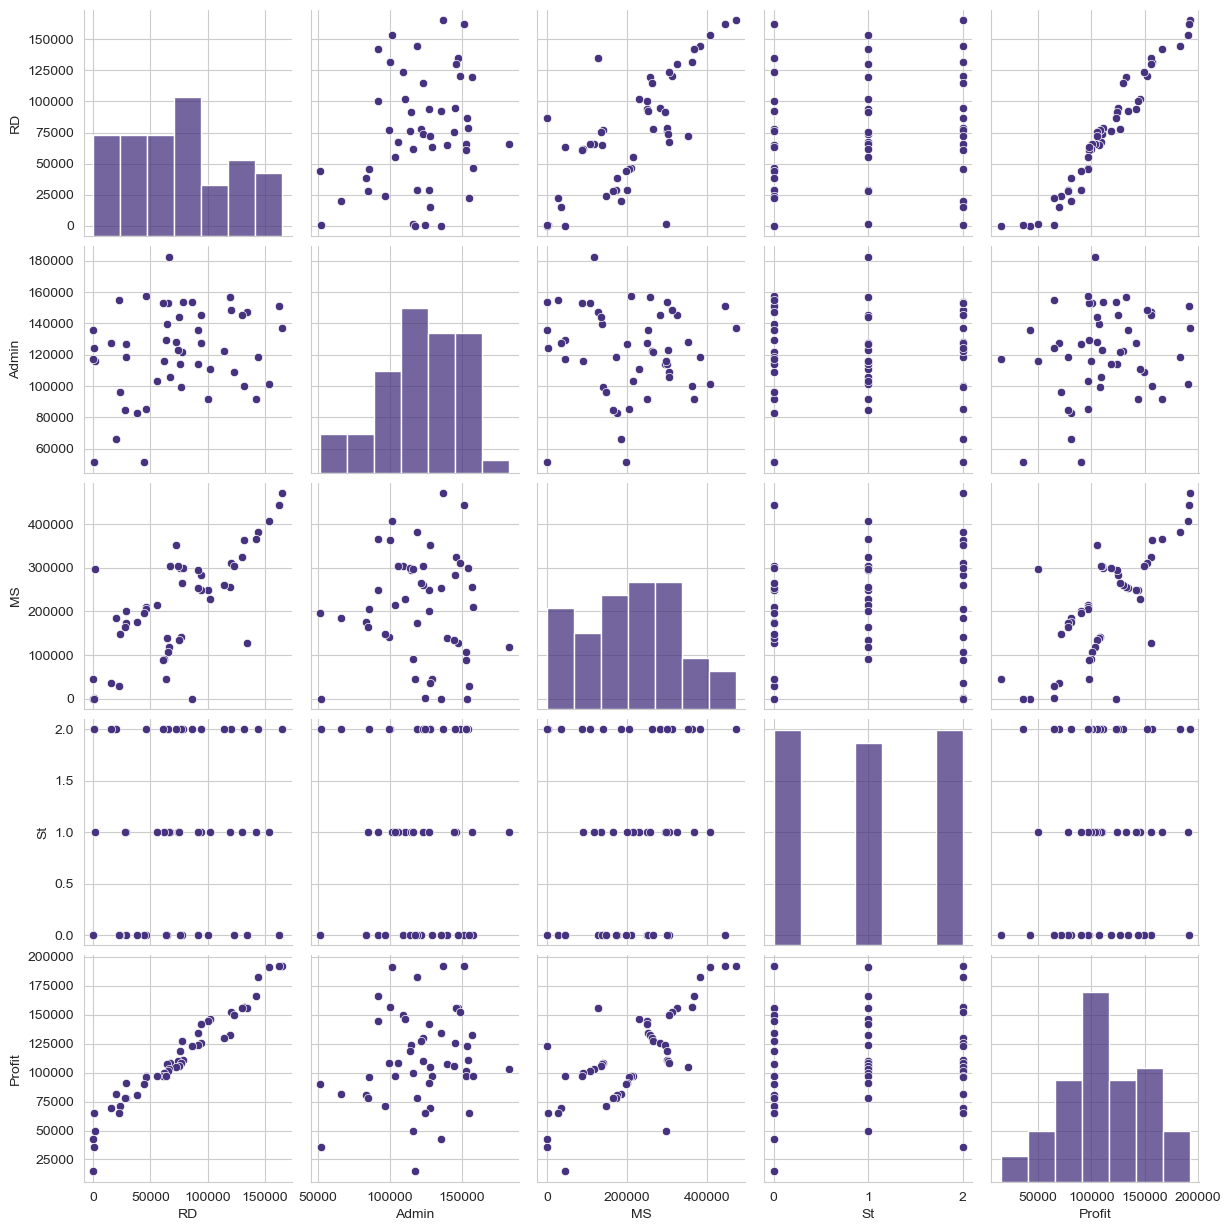

In [9]:
sns.set_palette('viridis')
sns.set_style(style= 'whitegrid')
sns.pairplot(data = df1)
plt.show()

+ From the pair plot it can be observed that the correlation between RD and profit is strongest compared to any other variable, the correlation between profit and MS is also good. However MS and RD have some correaltion but since this correlation in less than 85% we build the first model with all variables along with both variables ignoring this fact. 

## Model bulding and Checking and their evaluation

In [10]:
model_all = smf.ols('Profit~RD+Admin+MS+St',data=df1).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           8.51e-29
Time:                        14:19:11   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.014e+04   6804.555      7.369      0.0

In [11]:
# Coefficents
print(model_all.params)

Intercept    50142.506443
RD               0.805760
Admin           -0.026826
MS               0.027228
St             -22.320577
dtype: float64


In [12]:
# t-values and p-values
print(f''' t- values :-\n{model_all.tvalues},\n \n p- values :-\n{model_all.pvalues}''')

 t- values :-
Intercept     7.368962
RD           17.608621
Admin        -0.519906
MS            1.636966
St           -0.013865
dtype: float64,
 
 p- values :-
Intercept    2.900008e-09
RD           8.249206e-22
Admin        6.056771e-01
MS           1.086131e-01
St           9.889988e-01
dtype: float64


In [13]:
# R squared values
print(f'''R Squared values :- {model_all.rsquared} ,
Adjusted R Squared values :- {model_all.rsquared_adj}''')

R Squared values :- 0.9507462044842656 ,
Adjusted R Squared values :- 0.9463680893273114


### Even Though R Squared values = 0.95 which is good fit , but the p-values of 'Administration',	'Marketing Spend' and	'State' all are greater than 0.05 hence we don't have enough evidence to conclude that these variables have a significant impact on the dependent variable.

+ Inorder to figureout which dependent variable to drop, we build the SLR for variable seperatlty, first check will be done for 'St' because it has highest p-value

In [14]:
model_st = smf.ols('Profit~St',data=df1).fit()
print(model_st.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5026
Date:                Mon, 18 Dec 2023   Prob (F-statistic):              0.482
Time:                        14:19:28   Log-Likelihood:                -600.39
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.071e+05   9005.386     11.891      0.0

+ From the model summary R2 is 0.010 which means it explains onlty 1% of variation in 'Profit', further p-value for the variable is 0.482  indicating that we fail to reject null hyposthesis and 'Profit' is independent of 'St'

## Hence we reject State as dependent variable 

In [15]:
model_rd_admin_ms = smf.ols('Profit~RD+Admin+MS',data = df1).fit()
print(model_rd_admin_ms.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           4.53e-30
Time:                        14:19:33   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.0

In [16]:
# Coefficents
print(model_rd_admin_ms.params)

Intercept    50122.192990
RD               0.805715
Admin           -0.026816
MS               0.027228
dtype: float64


In [17]:
# t- value and p-value
print(f''' t- values :-\n{model_rd_admin_ms.tvalues},\n \n p- values :-\n{model_rd_admin_ms.pvalues}''')

 t- values :-
Intercept     7.626218
RD           17.846374
Admin        -0.525507
MS            1.655077
dtype: float64,
 
 p- values :-
Intercept    1.057379e-09
RD           2.634968e-22
Admin        6.017551e-01
MS           1.047168e-01
dtype: float64


In [18]:
# R squared values
print(f'''R Squared values :- {model_rd_admin_ms.rsquared} ,
Adjusted R Squared values :- {model_rd_admin_ms.rsquared_adj}''')

R Squared values :- 0.9507459940683246 ,
Adjusted R Squared values :- 0.9475337762901719


## As expected there is negligible decrease in r_squared value, 
+ Further still p-value of 'Admin' and 'MS' > 0.05 as 'Admin' variable has a higher p-value we investigate further 

+ SLR for 'Profit' and 'Admin'

In [19]:
model_admin = smf.ols('Profit~Admin',data=df1).fit()
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Mon, 18 Dec 2023   Prob (F-statistic):              0.162
Time:                        14:19:47   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model_admin = smf.ols('Profit~MS',data=df1).fit()
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           4.38e-10
Time:                        14:19:51   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

+ The model_admin has R2 value of only .04 and p-value of 0.162 > 0.05 
+ The model_MS has R2 value of 0.559 and p-value of 0.000 <0.05 
+ Futher the latter model has a lower AIC value indicating model with 'MS' has lower unexplaiuned variance compared to that using 'Admin'

#### Hence we reject 'Admin' for next model

In [21]:
model_rd_ms = smf.ols('Profit~RD+MS',data = df1).fit()
print(model_rd_ms.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           2.16e-31
Time:                        14:19:59   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.0

In [22]:
# Coefficents
print(model_rd_ms.params)

Intercept    46975.864221
RD               0.796584
MS               0.029908
dtype: float64


In [23]:
# t- value and p-value
print(f''' t- values :-\n{model_rd_ms.tvalues},\n \n p- values :-\n{model_rd_ms.pvalues}''')

 t- values :-
Intercept    17.463582
RD           19.265555
MS            1.927052
dtype: float64,
 
 p- values :-
Intercept    3.504062e-22
RD           6.040433e-24
MS           6.003040e-02
dtype: float64


In [24]:
# R squared values
print(f'''R Squared values :- {model_rd_ms.rsquared} ,
Adjusted R Squared values :- {model_rd_ms.rsquared_adj}''')

R Squared values :- 0.9504503015559763 ,
Adjusted R Squared values :- 0.9483418037498477


## There is negligible decrease in R2 value next even though now p-value of 'MS' is close to 0.05 still less hence we investigate it further.

In [25]:
model_rd = smf.ols('Profit~RD',data = df1).fit()
print(model_rd.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           3.50e-32
Time:                        14:20:16   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.0

In [26]:
# Coefficents
print(model_rd.params)

Intercept    49032.899141
RD               0.854291
dtype: float64


In [27]:
# t- value and p-value
print(f''' t- values :-\n{model_rd.tvalues},\n \n p- values :-\n{model_rd.pvalues}''')

 t- values :-
Intercept    19.320288
RD           29.151139
dtype: float64,
 
 p- values :-
Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [28]:
# R squared values
print(f'''R Squared values :- {model_rd.rsquared} ,
Adjusted R Squared values :- {model_rd.rsquared_adj}''')

R Squared values :- 0.9465353160804393 ,
Adjusted R Squared values :- 0.9454214684987817


## R_squared table for each model

In [29]:
d1 = {'model':['model_all','model_rd_admin_ms',
               'model_rd_ms','model_rd'],
      'r squared value':[model_all.rsquared,model_rd_admin_ms.rsquared,
                         model_rd_ms.rsquared,model_rd.rsquared],
      'adj r squared value':[model_all.rsquared_adj,model_rd_admin_ms.rsquared_adj,
                             model_rd_ms.rsquared_adj,model_rd.rsquared_adj]
     }
r2_df = pd.DataFrame(d1)
print(r2_df)

               model  r squared value  adj r squared value
0          model_all         0.950746             0.946368
1  model_rd_admin_ms         0.950746             0.947534
2        model_rd_ms         0.950450             0.948342
3           model_rd         0.946535             0.945421


+ From the models above it can be concluded 'R&D Spend' was the driving variable for 'Profit' in all start up other dependent factors had marginal impact on profit. Among all the remaining dependent variable 'Marketing Spend' seems to have maximum influence on the 'Profit'. However, it is very small compared to 'R&D Spend'.

## Q2 :- Toyoto Corolla

In [30]:
toyo = pd.read_csv("ToyotaCorolla.csv", encoding='windows-1252',
                   usecols=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])
print(toyo.head(3))

   Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165


In [31]:
print(toyo.shape)

(1436, 9)


In [32]:
print(toyo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB
None


In [33]:
print(toyo.describe())

              Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
2

In [34]:
print(toyo.corr())

                  Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876590 -0.569960  0.314990  0.126389  0.185326   
Age_08_04     -0.876590   1.000000  0.505672 -0.156622 -0.098084 -0.148359   
KM            -0.569960   0.505672  1.000000 -0.333538  0.102683 -0.036197   
HP             0.314990  -0.156622 -0.333538  1.000000  0.035856  0.092424   
cc             0.126389  -0.098084  0.102683  0.035856  1.000000  0.079903   
Doors          0.185326  -0.148359 -0.036197  0.092424  0.079903  1.000000   
Gears          0.063104  -0.005364  0.015023  0.209477  0.014629 -0.160141   
Quarterly_Tax  0.219197  -0.198431  0.278165 -0.298432  0.306996  0.109363   
Weight         0.581198  -0.470253 -0.028598  0.089614  0.335637  0.302618   

                  Gears  Quarterly_Tax    Weight  
Price          0.063104       0.219197  0.581198  
Age_08_04     -0.005364      -0.198431 -0.470253  
KM             0.015023       0.278165 -0.028598  
HP             

## Model Building 

In [35]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyo).fit()

In [36]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:21:01   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949

In [37]:
print(model.params)

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64


In [38]:
print(f"R_squared :- {model.rsquared} \nR_squared_adjusted :- {model.rsquared_adj}")

R_squared :- 0.8637627463428192 
R_squared_adjusted :- 0.8629989775766963


In [39]:
# t- value and p-value
print(f''' t- values :-\n{model.tvalues},\n \n p- values :-\n{model.pvalues}''')

 t- values :-
Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64,
 
 p- values :-
Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


+ From the model summary we see that for Variable 'CC' and 'Doors' we fail to reject null hypothesis because p-value > 0.05 hence the variables require further investigation

+ SLR for both the variable 

In [40]:
model_cc = smf.ols('Price~cc', data=toyo).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.55e-06
Time:                        14:21:24   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
model_door = smf.ols('Price~Doors', data=toyo).fit()
model_door.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.46e-12
Time:                        14:21:36   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ The R2 and p-value of cc states model is able to explain 1.6 % variation in Price but p-value is < 0.05. Interpretation of both of these values donot convey the same meaning similar interpretaion can be drawn from model build using Doors it explains 3.4 % only but p-value < 0.05. So, we build model using both the variable 

In [42]:
model_cc_door = smf.ols('Price~cc+Doors',data = toyo).fit()
model_cc_door.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.15e-15
Time:                        14:21:40   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

+ According to this model together both variables are only able to explain 4.7 % variation in Profit

## Calculating VIF


In [43]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyo).fit().rsquared
VIF_age = 1/(1-rsq_age)
rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyo).fit().rsquared
VIF_KM = 1/(1-rsq_KM)
rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyo).fit().rsquared
VIF_hp = 1/(1-rsq_hp)
rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyo).fit().rsquared
VIF_cc = 1/(1-rsq_cc)
rsq_doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyo).fit().rsquared
VIF_doors = 1/(1-rsq_doors)
rsq_gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=toyo).fit().rsquared
VIF_gears = 1/(1-rsq_gears)
rsq_qtax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=toyo).fit().rsquared
VIF_qtax = 1/(1-rsq_qtax)
rsq_weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=toyo).fit().rsquared
VIF_weight = 1/(1-rsq_weight)

# Storing The VIF values in DataFrame 
d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],
      'VIF_values':[VIF_age,VIF_KM,VIF_hp,VIF_cc,VIF_doors,VIF_gears,VIF_qtax,VIF_weight]}
vif_frame = pd.DataFrame(d1)
print(vif_frame)

       Variables  VIF_values
0      Age_08_04    1.884620
1             KM    1.756905
2             HP    1.419422
3             cc    1.163894
4          Doors    1.156575
5          Gears    1.098723
6  Quarterly_Tax    2.311431
7         Weight    2.516420


+ All the VIF_values are less than 5 indicating none of the dependent variables have significant impact on the model

## Residual Analysis

+ Test for normality of residual

In [44]:
model.resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

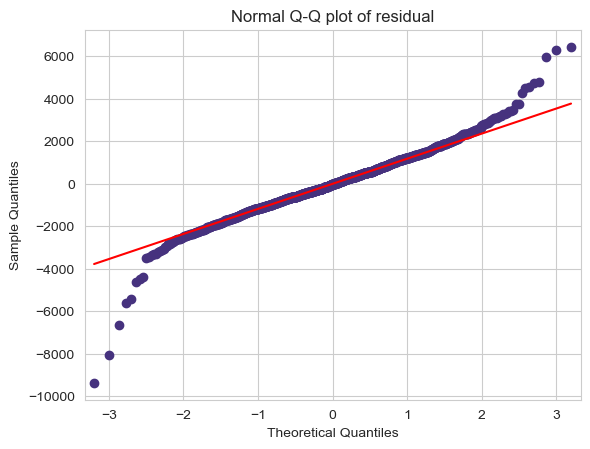

In [45]:
import statsmodels.api as sm
sm.qqplot(model.resid,line = 'q')
plt.title("Normal Q-Q plot of residual")
plt.show()

In [46]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  205,  210,  211,
         216,  223,  230,  232,  233, 

## Residual Plot for Homoscedasticity 

In [47]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

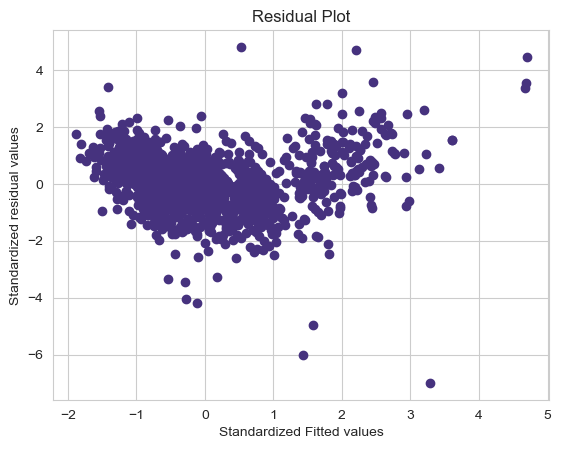

In [48]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual V/s Regressor

eval_env: 1


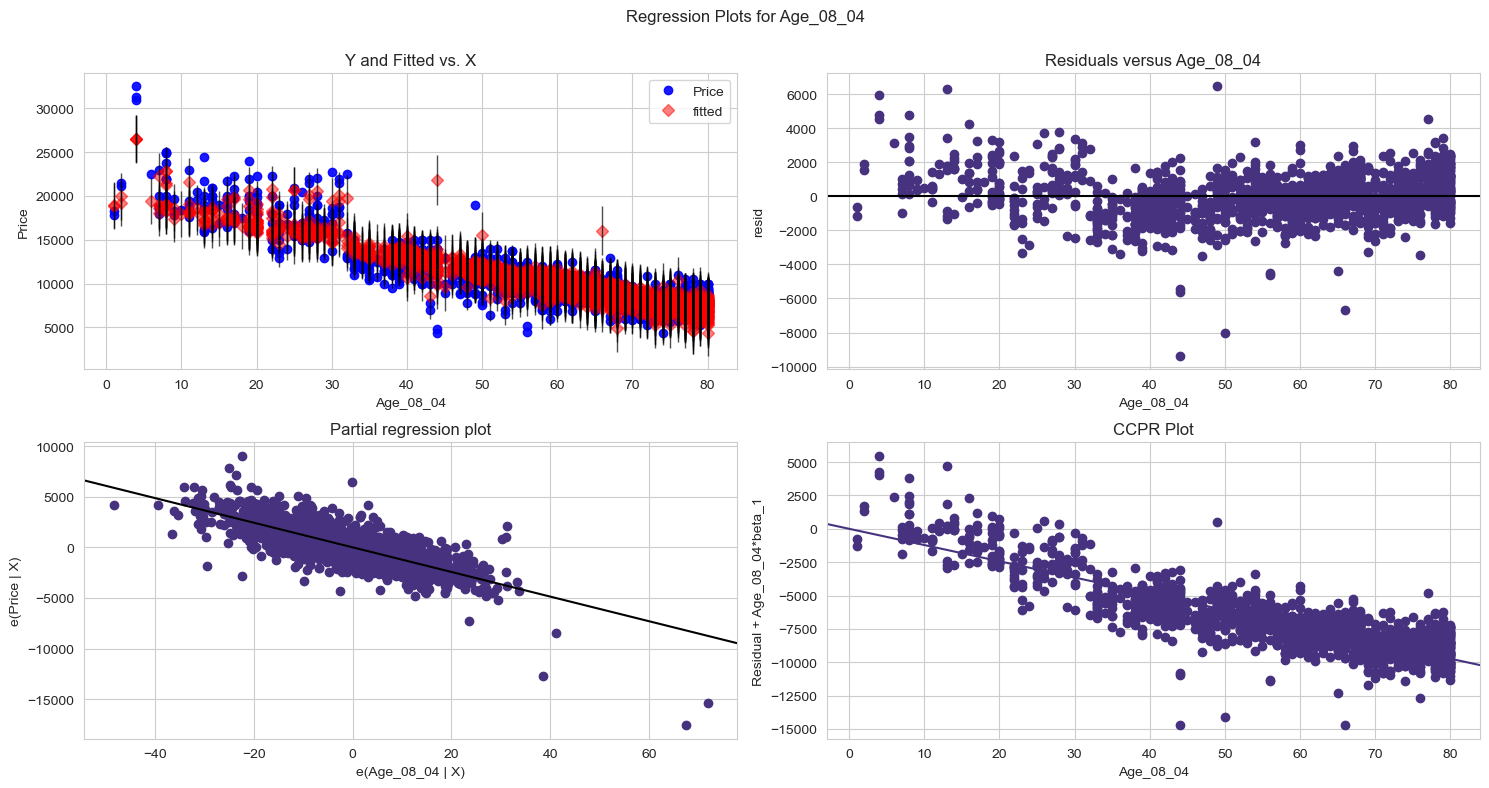

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

eval_env: 1


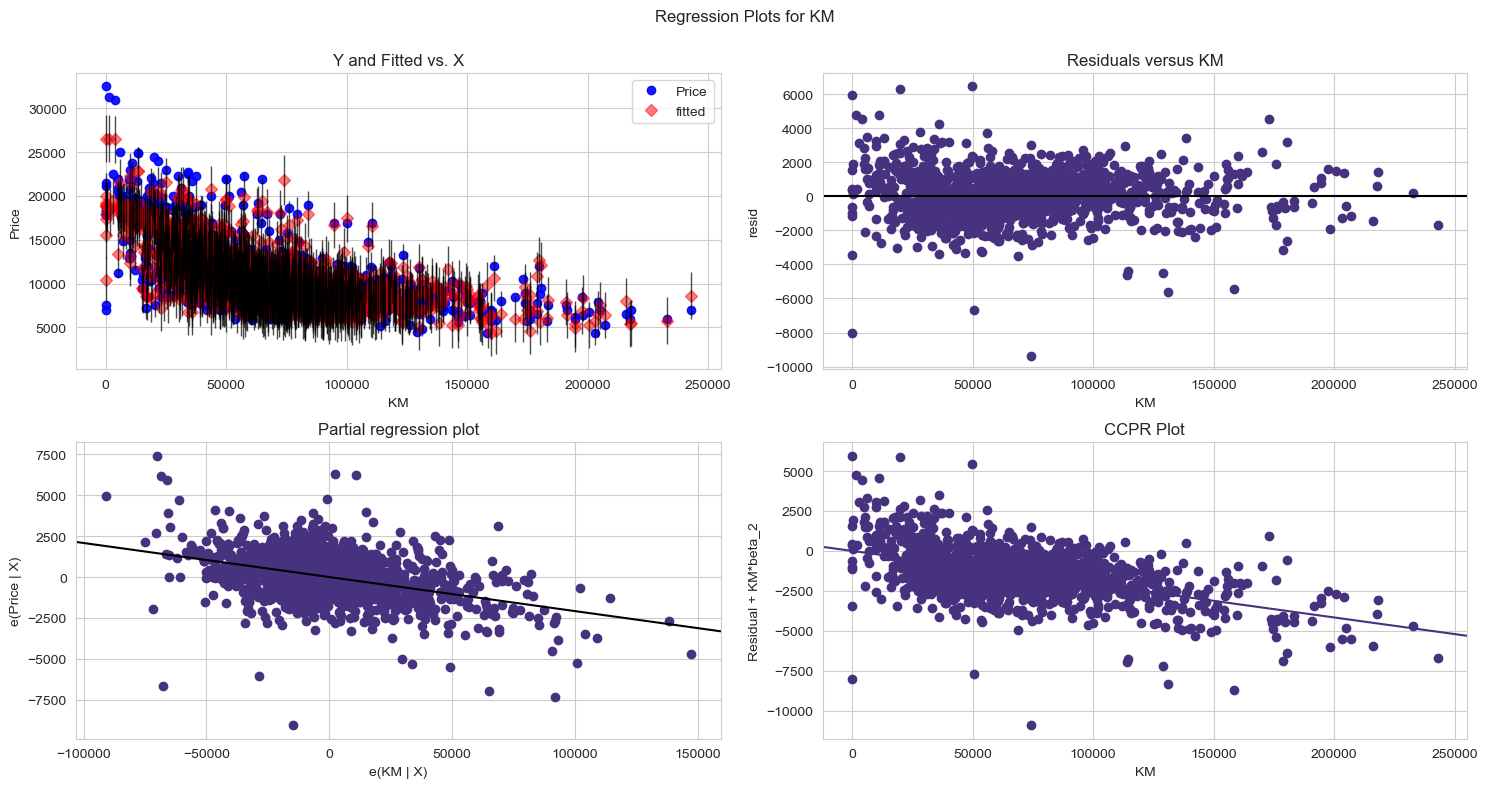

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


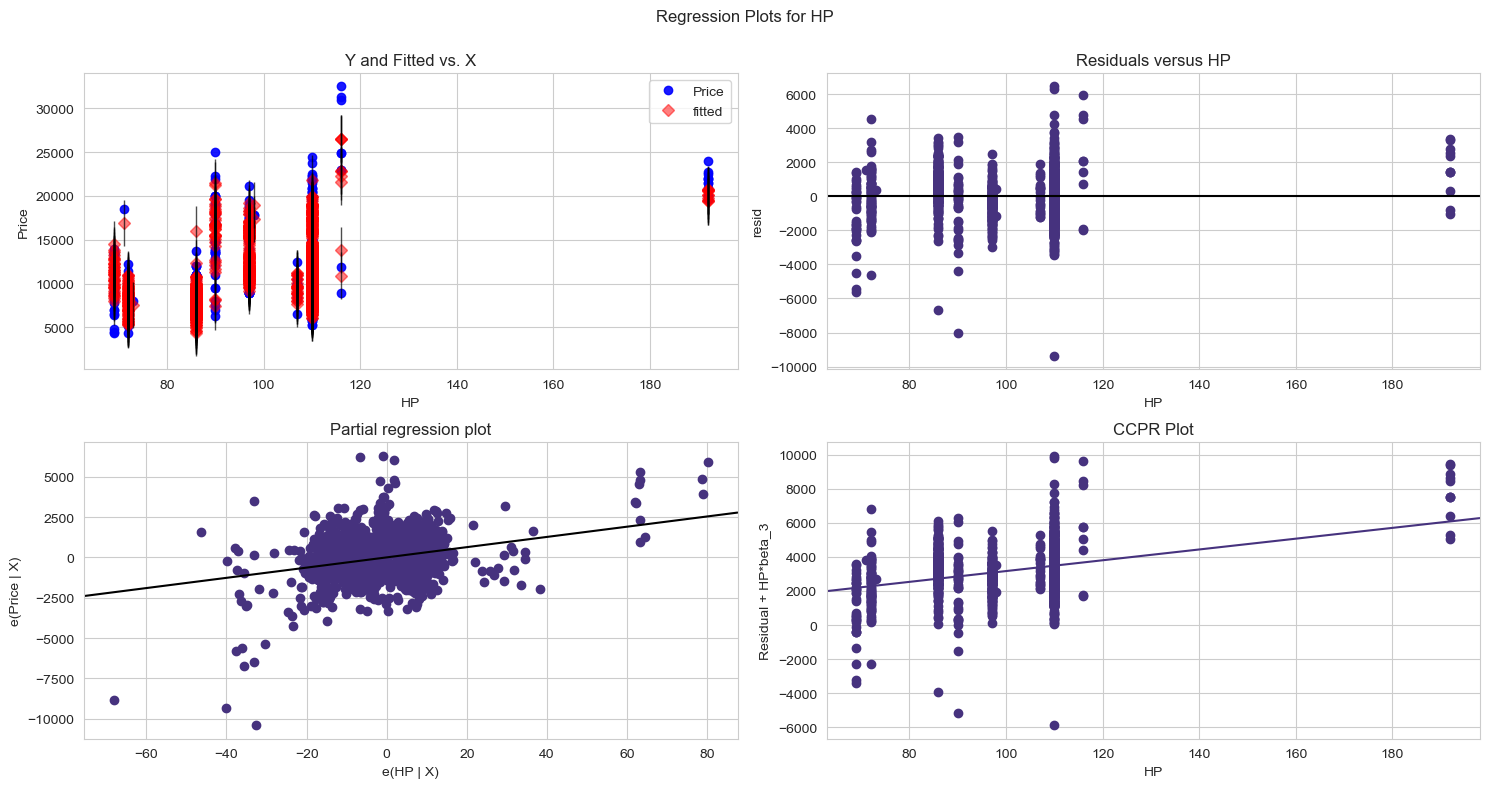

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


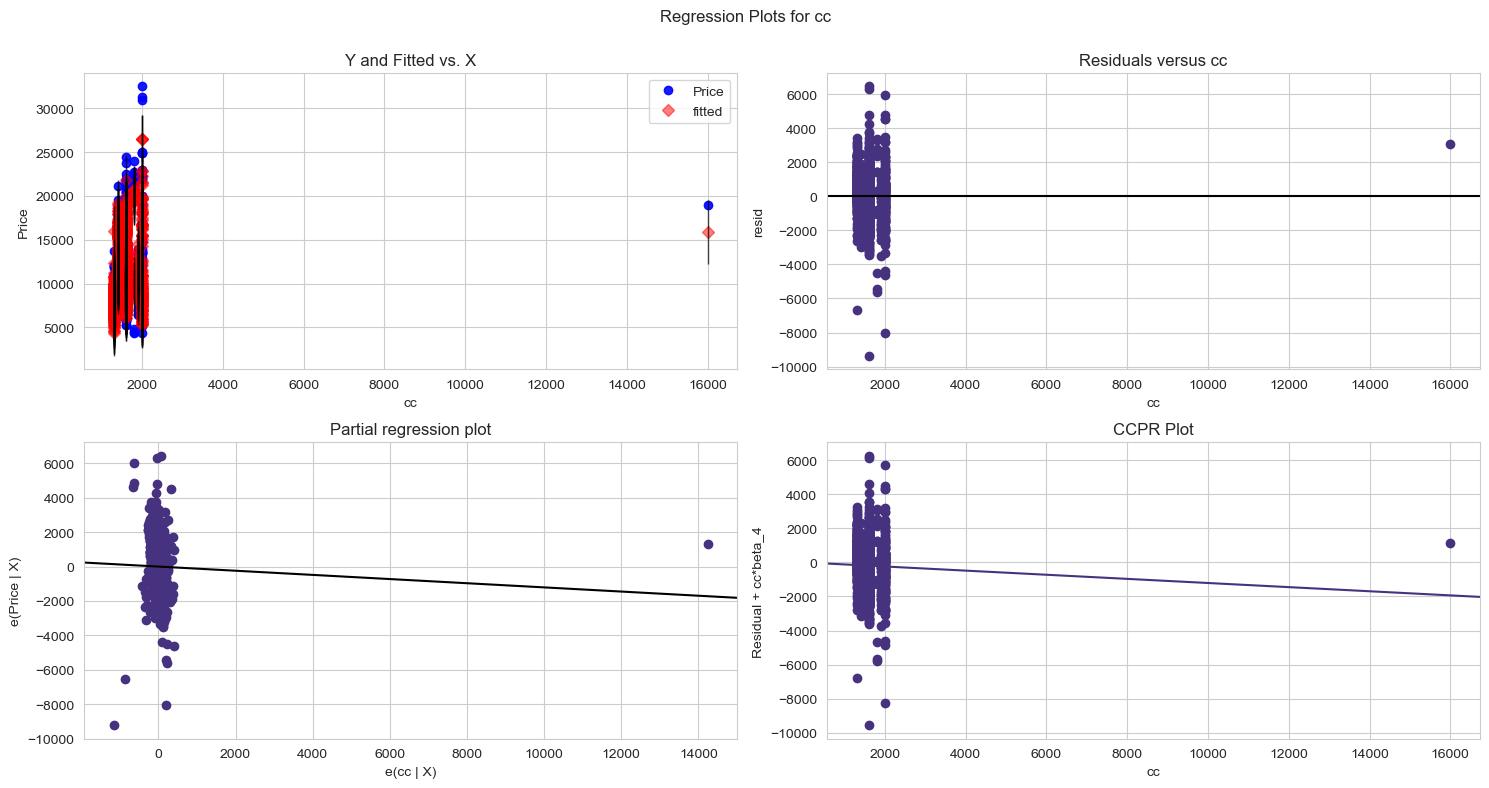

In [52]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


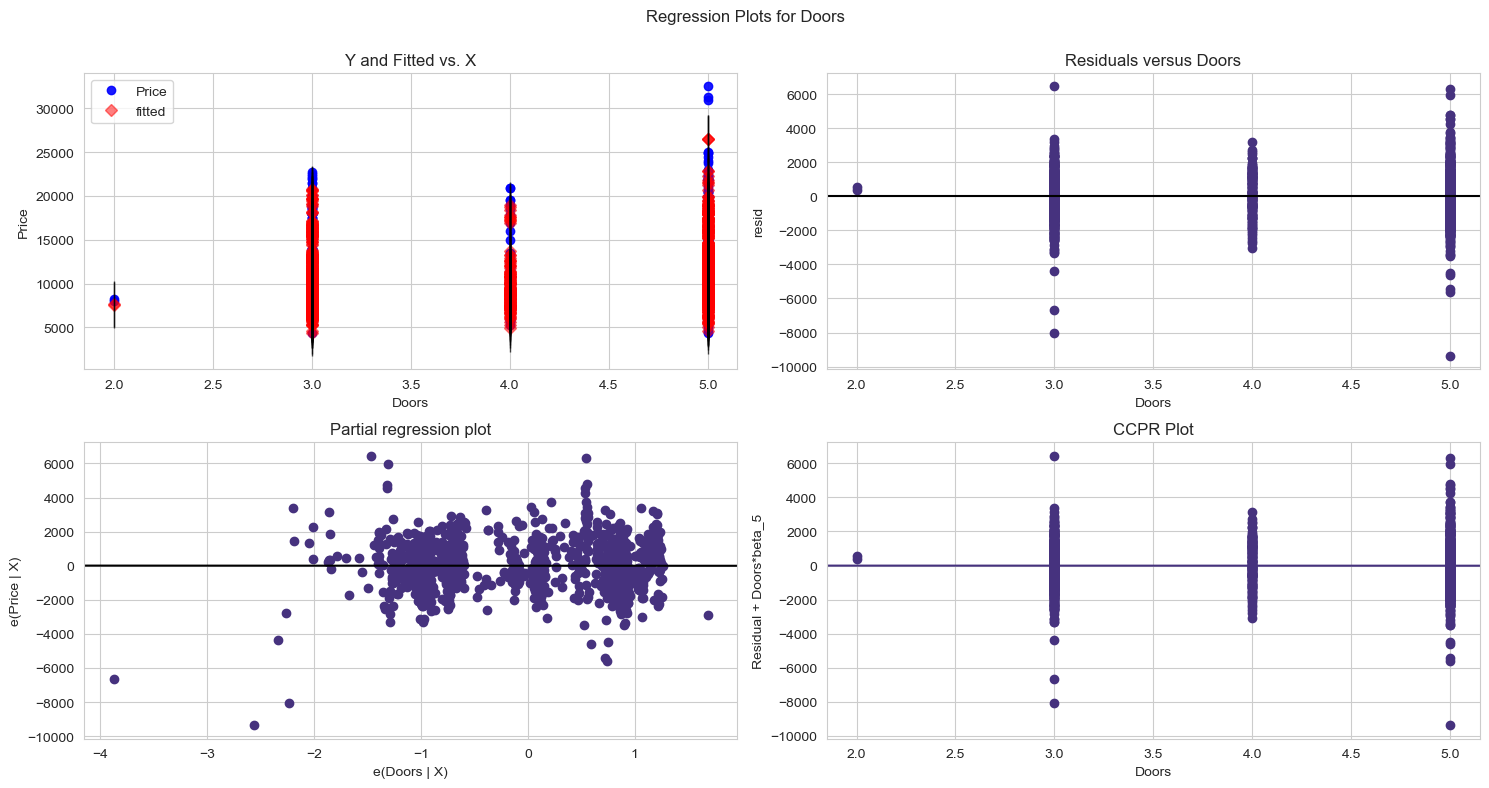

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


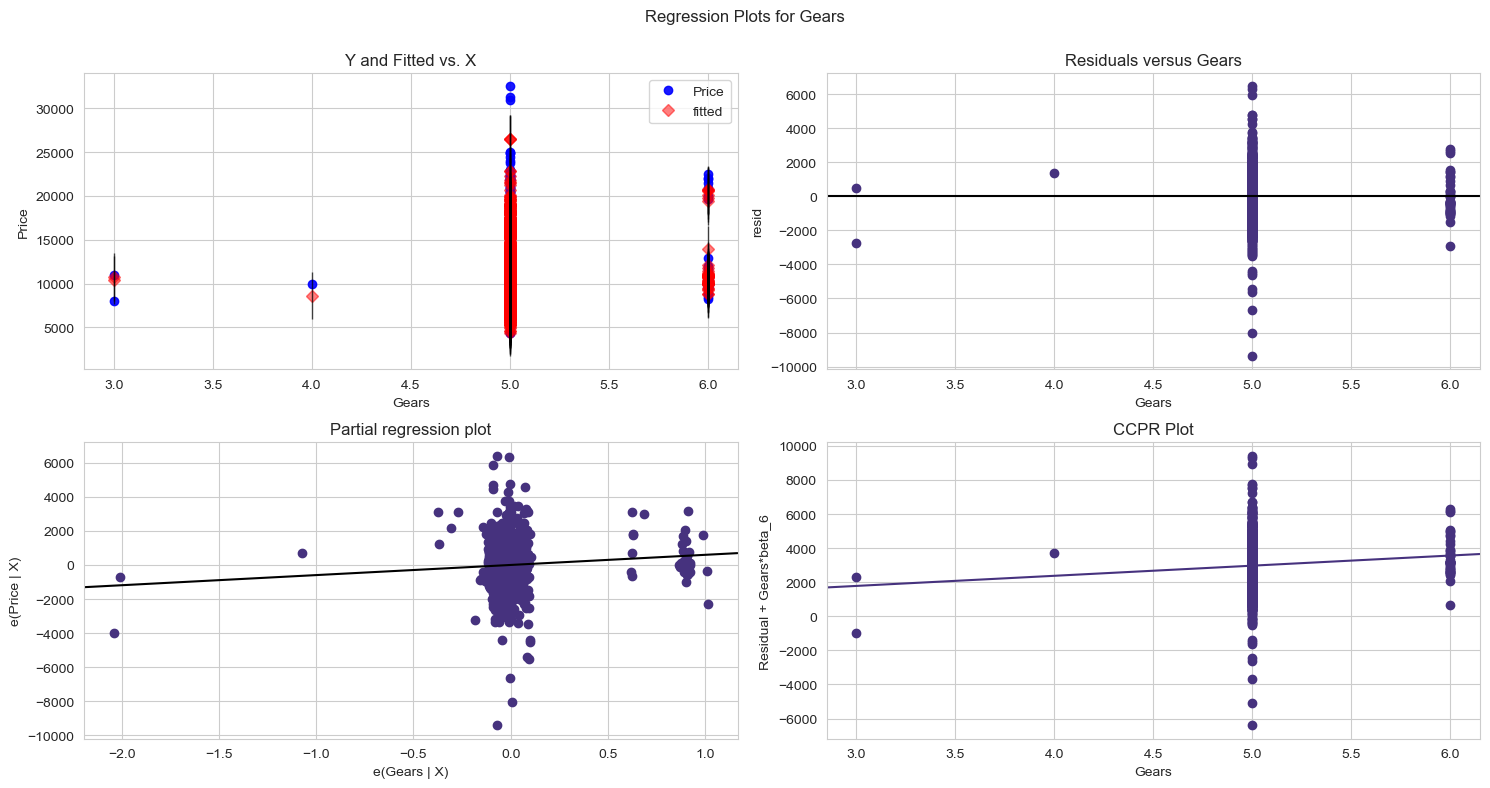

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


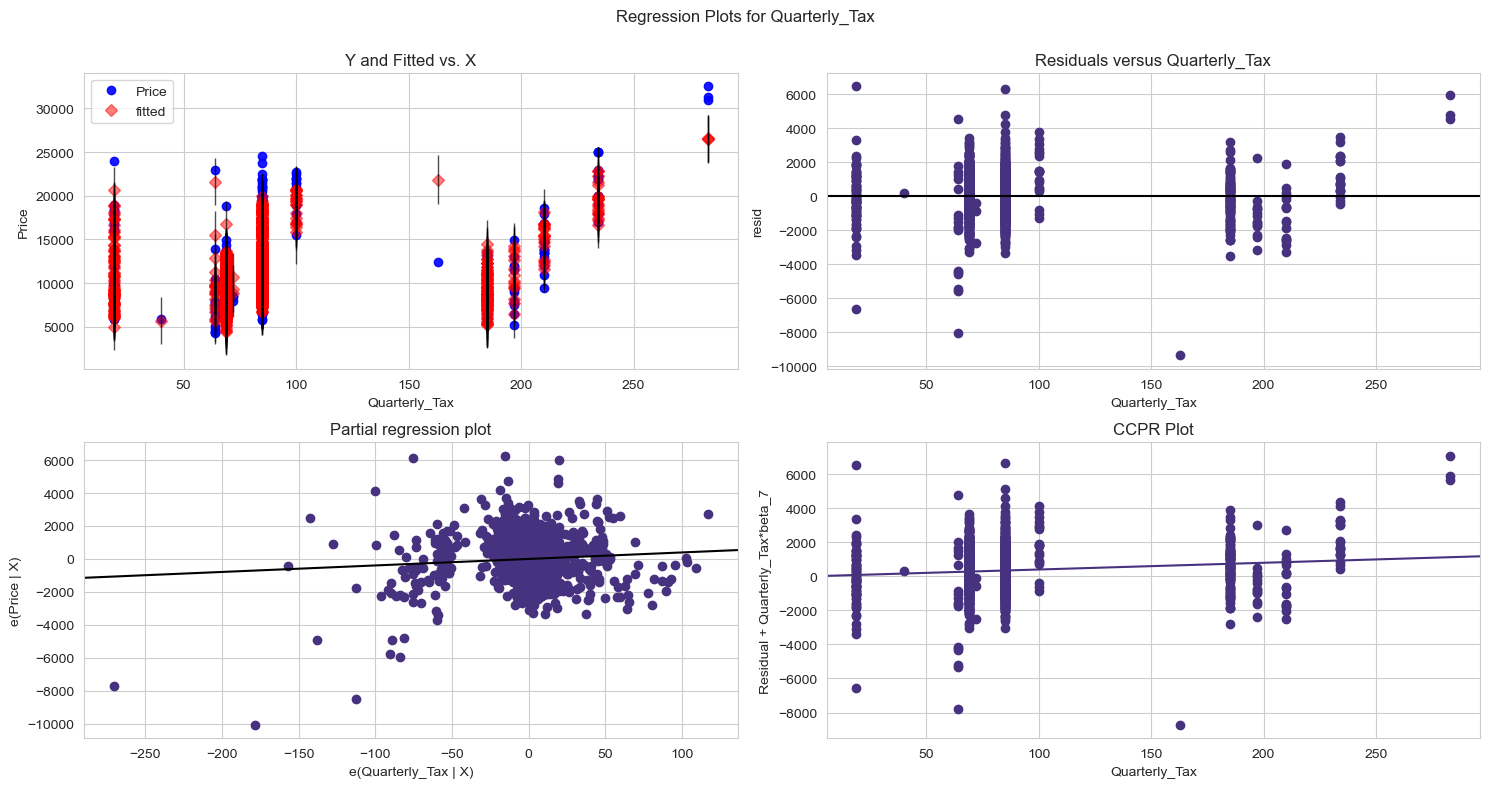

In [55]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


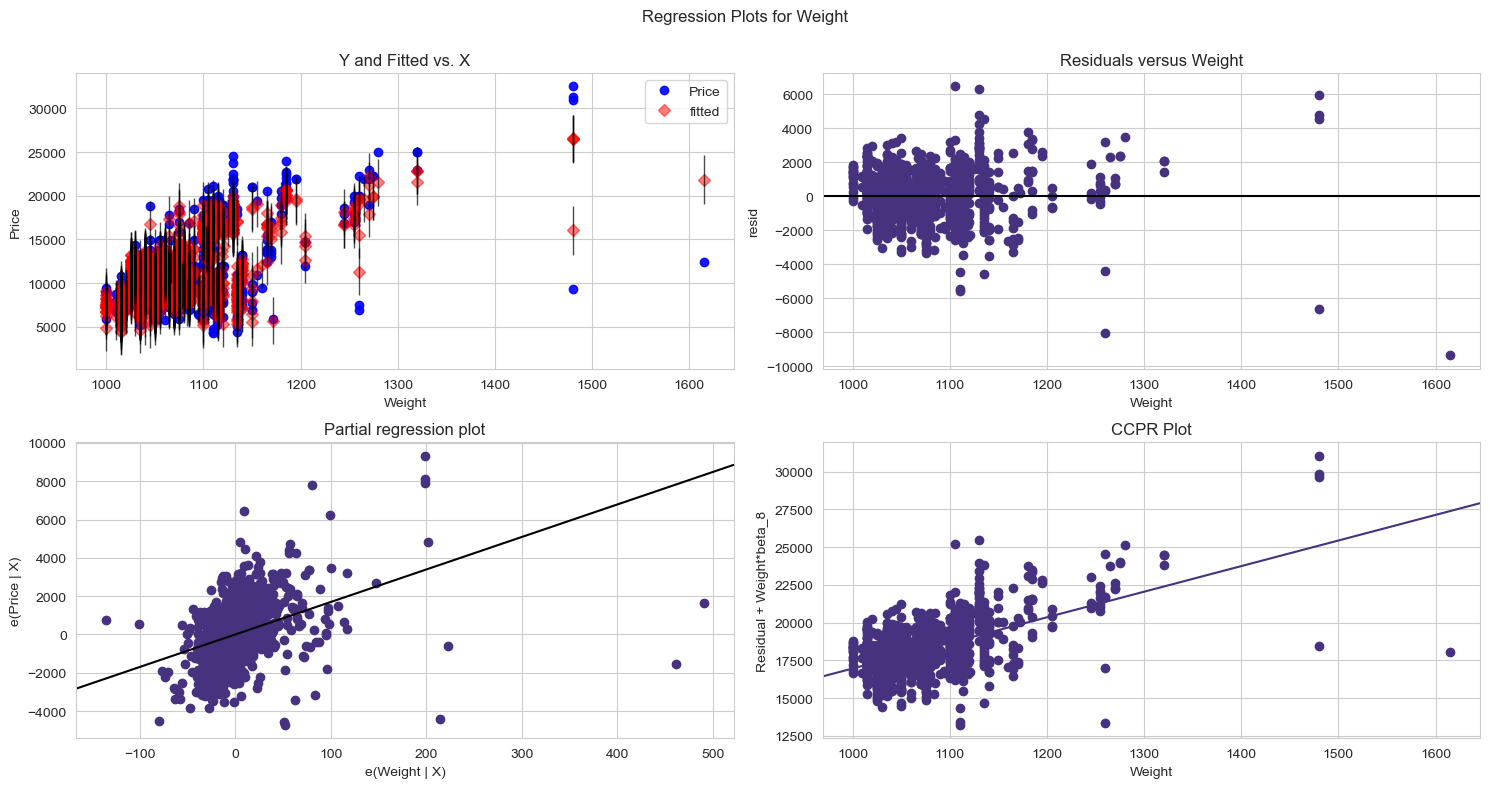

In [56]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

+ From the Partial regression plot the third figure it is clear that the error in price independent of 'Doors' that is it is not a good predictor

## Model deletion diagnostics :- 

In [57]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

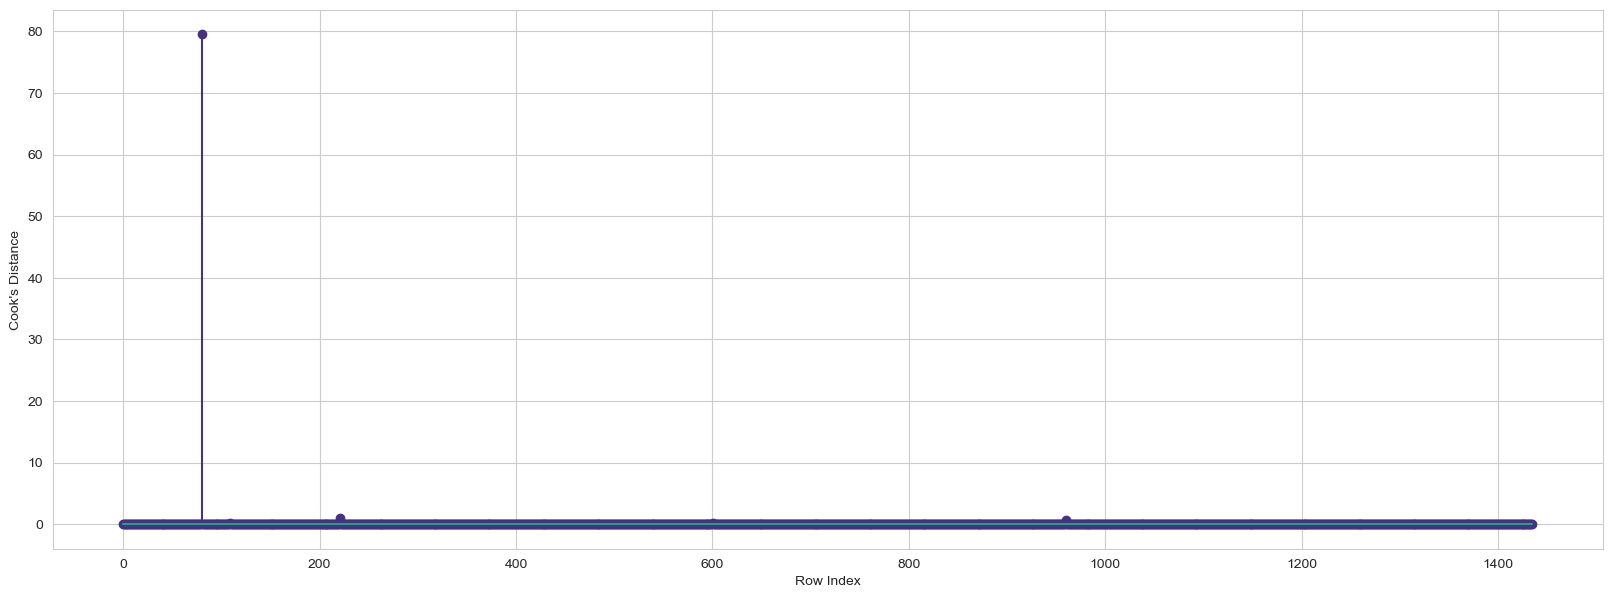

In [58]:
# plot the influence values using stem plot
fig = plt.subplots(figsize = ((20,7)))
plt.stem(np.arange(len(toyo)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.show()

In [59]:
print((np.argmax(c),np.max(c)))

(80, 79.52010624137341)


# High Influence Points

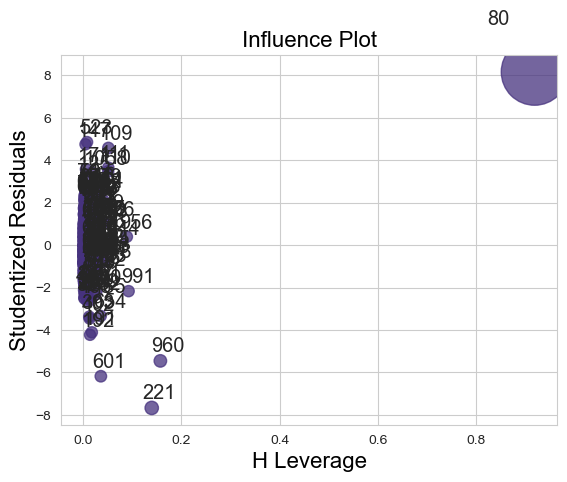

In [60]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [61]:
print(toyo.shape)

(1436, 9)


In [62]:
k = toyo.shape[1]
n = toyo.shape[0]
leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

0.020891364902506964


+ From the plot it is evident that 80 is a Highly influential point

In [63]:
toyo[toyo.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


+ The Difference in CC value can be observed and may be affecting the model 

In [65]:
toyo.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## Improving the model

In [66]:
#Load the data
toyo_new = pd.read_csv("ToyotaCorolla.csv", encoding='windows-1252',
                   usecols=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])

In [67]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyo1=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index()
toyo1

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [68]:
#Drop the original index
toyo1=toyo1.drop(['index'],axis=1)

## Build the new model
+ Excluding the Doors variable 

In [69]:
model_cc = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyo1).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:25:56   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age_08_04      -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM               -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP               39.1593      2.898     13.512      0.000      33.474      44.844
cc               -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Gears           549.7311    189.216      2.905      0.004     178.561     920.902
Quarterly_Tax     9.0759      1.424      6.374      0.000       6.283      11.869
Weight           19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
(model_cc.rsquared,model_cc.aic)

(0.8693349475698541, 24685.765438793034)

+ Excluding cc variable 

In [71]:
model_doors = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyo1).fit()
model_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1286.
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:26:27   Log-Likelihood:                -12368.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1427   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5434.8906   1410.637     -3.853      0.000   -8202.036   -2667.745
Age_08_04      -121.6865      2.616    -46.512      0.000    -126.819    -116.554
KM               -0.0209      0.001    -16.737      0.000      -0.023      -0.018
HP               31.3562      2.807     11.170      0.000      25.850      36.863
Doors            -1.0602     40.013     -0.026      0.979     -79.551      77.430
Gears           598.5410    197.089      3.037      0.002     211.925     985.157
Quarterly_Tax     3.7658      1.301      2.894      0.004       1.214       6.318
Weight           16.6824      1.056     15.802      0.000      14.612      18.753
==============================================================================
Omnibus:                      146.861   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.897
Skew:                          -0.200   Prob(JB):                    3.64e-209
Kurtosis:                       6.987   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
(model_doors.rsquared,model_doors.aic)

(0.8631959819380925, 24751.649416173997)

+ Excluding both the variable cc and Doors

In [73]:
model_new = smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=toyo1).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1502.
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:26:42   Log-Likelihood:                -12368.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1428   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5436.2633   1409.192     -3.858      0.000   -8200.572   -2671.954
Age_08_04      -121.6862      2.615    -46.529      0.000    -126.816    -116.556
KM               -0.0209      0.001    -16.750      0.000      -0.023      -0.018
HP               31.3510      2.799     11.199      0.000      25.860      36.842
Gears           599.5317    193.442      3.099      0.002     220.071     978.992
Quarterly_Tax     3.7685      1.297      2.906      0.004       1.225       6.312
Weight           16.6754      1.021     16.325      0.000      14.672      18.679
==============================================================================
Omnibus:                      146.725   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              958.370
Skew:                          -0.200   Prob(JB):                    7.81e-209
Kurtosis:                       6.984   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
(model_new.rsquared,model_new.aic)

(0.8631959146366653, 24749.650122129315)

## The First model looks the best after removal of the outlier value and has the least AIC value so we finalize the model

## Checking the cooks distance again 

In [75]:
model_influence_new = model_cc.get_influence()
(c_V, _) = model_influence_new .cooks_distance

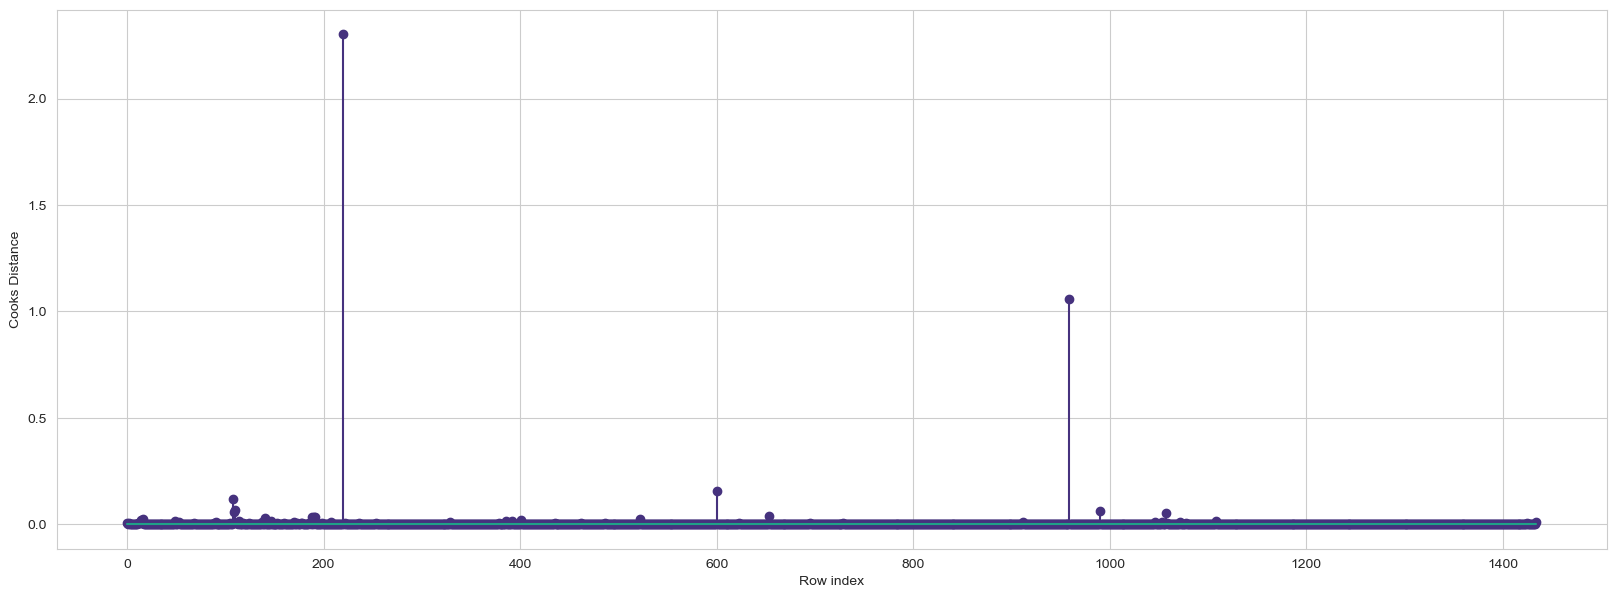

In [76]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyo1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [77]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(220, 2.3034451664540634)

In [78]:
#Drop 220 observation
toyo2=toyo1.drop(toyo_new.index[[221]],axis=0).reset_index()

In [80]:
#Drop the original index
toyo2=toyo2.drop(['index'],axis=1)
toyo2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


## Build the Model

In [81]:
ml_final = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyo2).fit()

In [82]:
#Again check for influencers
model_influence = ml_final.get_influence()
(c_V, _) = model_influence.cooks_distance

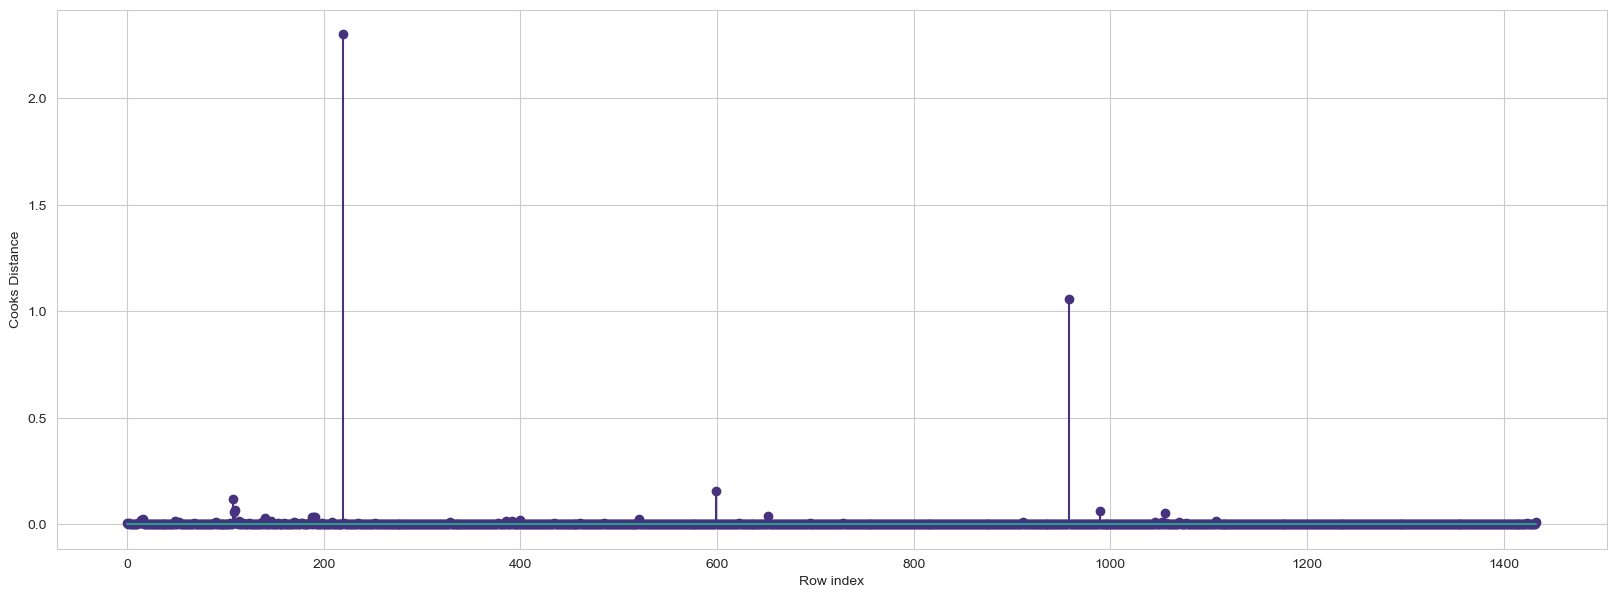

In [83]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyo2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [84]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(220, 2.301392525330334)

+ Still there is an outlier we delete it 

In [85]:
#Drop 220 observation
toyo3=toyo2.drop(toyo2.index[[220]],axis=0).reset_index()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1429,7500,69,20544,86,1300,3,5,69,1025
1429,1430,10845,72,19000,86,1300,3,5,69,1015
1430,1431,8500,71,17016,86,1300,3,5,69,1015
1431,1432,7250,70,16916,86,1300,3,5,69,1015


In [86]:
#Drop the original index
toyo3=toyo3.drop(['index'],axis=1)
toyo3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


## Rebuild the model and Check Cooks distance 

In [87]:
ml_final = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyo3).fit()

In [88]:
#Again check for influencers
model_influence = ml_final.get_influence()
(c_V, _) = model_influence.cooks_distance

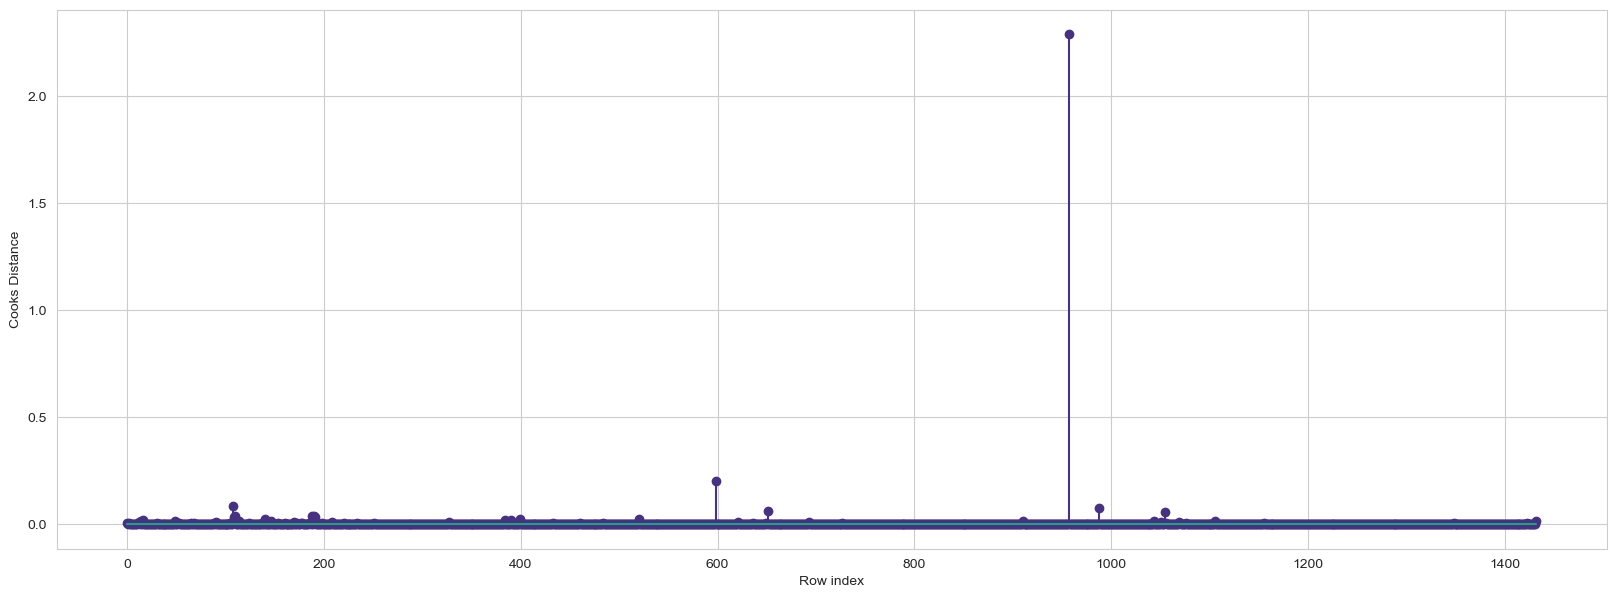

In [89]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyo3)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [90]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(957, 2.288110383012708)

In [91]:
#Drop 957 observation
toyo4=toyo3.drop(toyo3.index[[957]],axis=0).reset_index()
toyo4

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1427,1428,7500,69,20544,86,1300,3,5,69,1025
1428,1429,10845,72,19000,86,1300,3,5,69,1015
1429,1430,8500,71,17016,86,1300,3,5,69,1015
1430,1431,7250,70,16916,86,1300,3,5,69,1015


In [92]:
#Drop the original index
toyo5=toyo4.drop(['index'],axis=1)
toyo5

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


## Rebuild the model and check the cook's distance 

In [93]:
ml_final = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyo5).fit()

In [95]:
model_influence = ml_final.get_influence()
(c,_) = model_influence.cooks_distance

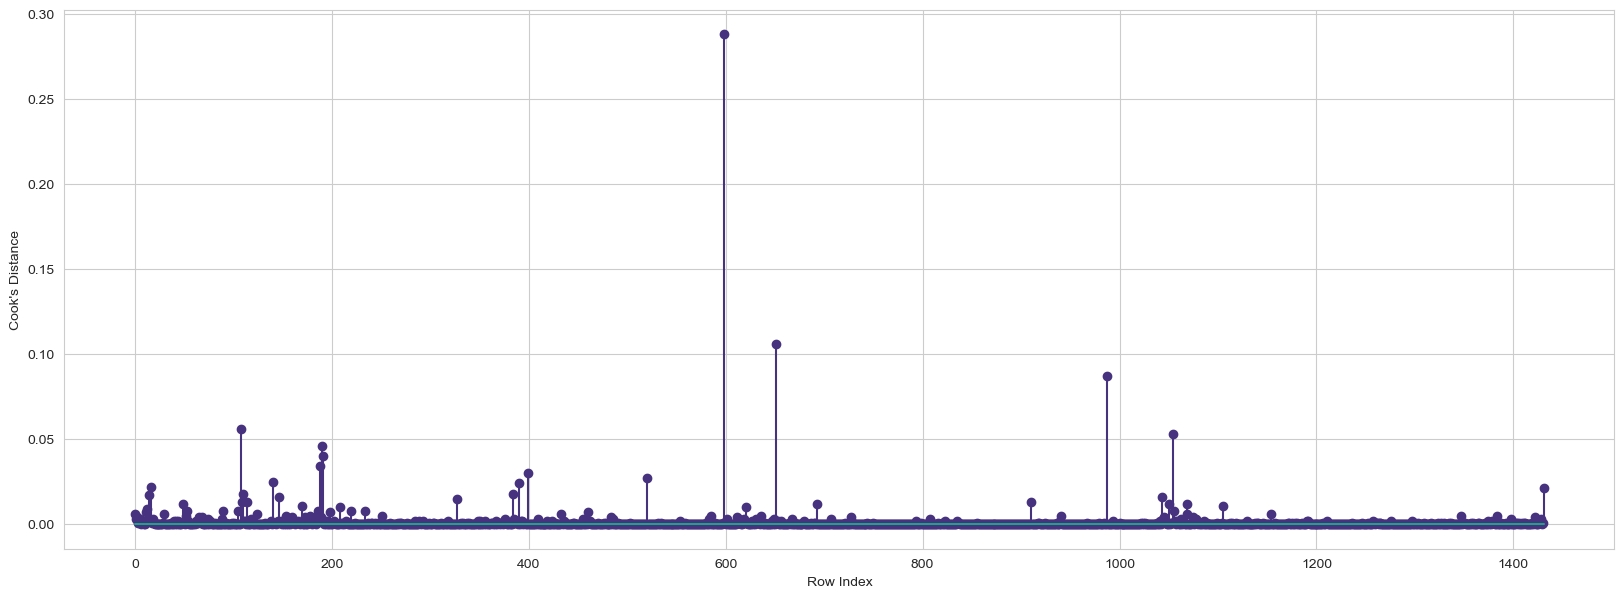

In [97]:
# plot the influence values using stem plot
fig = plt.subplots(figsize = ((20,7)))
plt.stem(np.arange(len(toyo5)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.show()

In [98]:
print(f"Indices where cooks distance is greater than 1 are \n {np.argwhere(c>1)} ")

Indices where cooks distance is greater than 1 are 
 [] 


## Since no data points have cook's distance > 1.0 , for all remaing data points we stop the diagnosis and finalize the model 

In [99]:
# Coefficients of model 
print(ml_final.params)

Intercept       -14483.363859
Age_08_04         -112.454177
KM                  -0.017205
HP                  35.975805
cc                  -3.665763
Gears              578.335595
Quarterly_Tax        5.537889
Weight              29.285344
dtype: float64


In [100]:
ml_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1555.
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:50:11   Log-Likelihood:                -12223.
No. Observations:                1432   AIC:                         2.446e+04
Df Residuals:                    1424   BIC:                         2.450e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.448e+04   1436.395    -10.083      0.000   -1.73e+04   -1.17e+04
Age_08_04      -112.4542      2.487    -45.221      0.000    -117.332    -107.576
KM               -0.0172      0.001    -14.307      0.000      -0.020      -0.015
HP               35.9758      2.748     13.090      0.000      30.585      41.367
cc               -3.6658      0.301    -12.193      0.000      -4.256      -3.076
Gears           578.3356    178.217      3.245      0.001     228.740     927.931
Quarterly_Tax     5.5379      1.373      4.034      0.000       2.845       8.231
Weight           29.2853      1.228     23.853      0.000      26.877      31.694
==============================================================================
Omnibus:                      109.729   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.505
Skew:                          -0.061   Prob(JB):                    3.55e-124
Kurtosis:                       6.084   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
print(f"R_squared :- {ml_final.rsquared} \nR_squared_adjusted :- {ml_final.rsquared_adj}")

R_squared :- 0.8843437169446828 
R_squared_adjusted :- 0.883775181845394


In [102]:
# t- value and p-value
print(f''' t- values :-\n{ml_final.tvalues},\n \n p- values :-\n{ml_final.pvalues}''')

 t- values :-
Intercept       -10.083137
Age_08_04       -45.221400
KM              -14.306551
HP               13.090434
cc              -12.192946
Gears             3.245122
Quarterly_Tax     4.034213
Weight           23.853325
dtype: float64,
 
 p- values :-
Intercept         3.839815e-23
Age_08_04        1.304755e-277
KM                1.761725e-43
HP                4.687186e-37
cc                1.342748e-32
Gears             1.201272e-03
Quarterly_Tax     5.769344e-05
Weight           4.460679e-106
dtype: float64


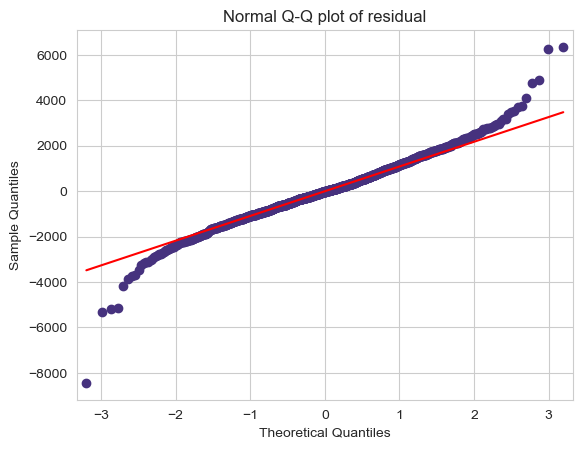

In [104]:
sm.qqplot(ml_final.resid,line = 'q')
plt.title("Normal Q-Q plot of residual")
plt.show()